In [58]:
# Setup for a bar cammed between parallel walls. 
# F_L is force on left end. F_R is force on right end.
# Left end is assumed to be a fixed pivot point
# Right end is assumed to see a force which is normal to the bar.

import sympy as sp
import numpy as np

# Define the variables
F_n, F_a = sp.symbols('F_n F_a')
F_L_x, F_L_y = sp.symbols('F_L_x F_L_y')
r, x, theta, mu = sp.symbols('r x 𝜃 µ')


# Define the equations
eq1 = sp.Eq(F_L_y + F_n * sp.cos(theta) - F_a, 0)
eq2 = sp.Eq(F_L_x - F_n * sp.sin(theta), 0)
eq3 = sp.Eq((r + x) * F_n - r * F_a * sp.cos(theta), 0)
#eq4 = sp.Eq(F_L_y F_L_x * sp.tan(theta))  # Constraint for F_L pointing along the length of the bar
#eq4 = sp.Eq(F_R_y, mu * F_R_x)
#eq4 = sp.Eq(F_R_y / F_R_x, sp.cot(theta))

# Solve the system of equations
solution = sp.solve([eq1, eq2, eq3], (F_L_y, F_L_x, F_n))

solution

{F_L_x: F_a*r*sin(𝜃)*cos(𝜃)/(r + x),
 F_L_y: -F_a*r*cos(𝜃)**2/(r + x) + F_a*r/(r + x) + F_a*x/(r + x),
 F_n: F_a*r*cos(𝜃)/(r + x)}

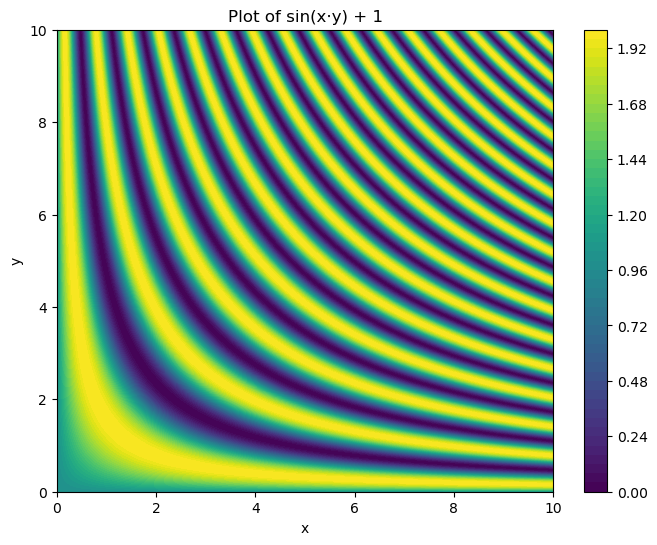

In [86]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def plot_sympy_expression(expr, x_var, y_var, x_range, y_range, **var_values):
    """
    Plots a SymPy expression with specified values for some variables, while 
    using the remaining variables to represent the x and y axes.

    Parameters:
    -----------
    expr : sympy.Expr
        The SymPy expression to plot.
    x_var : sympy.Symbol
        The variable to be used for the x-axis.
    y_var : sympy.Symbol
        The variable to be used for the y-axis.
    x_range : tuple
        A tuple specifying the range of values for the x-axis in the form (x_min, x_max).
    y_range : tuple
        A tuple specifying the range of values for the y-axis in the form (y_min, y_max).
    **var_values : dict
        A dictionary where the keys are SymPy Symbols and the values are the numerical values 
        to be substituted for those variables in the expression.

    Returns:
    --------
    None
    """

    # Substitute the given variable values into the expression
    expr_substituted = expr.subs(var_values)
    # Convert the sympy expression to a lambda function for numerical evaluation
    f = sp.lambdify((x_var, y_var), expr_substituted, "numpy")

    # Create a grid of x and y values
    x_vals = np.linspace(x_range[0], x_range[1], 400)
    y_vals = np.linspace(y_range[0], y_range[1], 400)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Evaluate the function on the grid
    Z = f(X, Y)

    # Plotting the result
    plt.figure(figsize=(8, 6))
    cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(cp)
    plt.xlabel(str(x_var))
    plt.ylabel(str(y_var))
    plt.title(f"Plot of {sp.pretty(expr_substituted)}")
    plt.show()

# Example usage
x, y, z = sp.symbols('x y z')
expr = sp.sin(x*y) + z

plot_sympy_expression(expr, x, y, x_range=(0, 10), y_range=(0, 10), z=1)

In [59]:
s_L_x = sp.simplify(solution[F_L_x])
s_L_x

F_a*r*sin(2*𝜃)/(2*(r + x))

In [60]:
s_L_y = sp.simplify(solution[F_L_y])
s_L_y

F_a*(r*sin(𝜃)**2 + x)/(r + x)

In [61]:
s_n = sp.simplify(solution[F_n])
s_n

F_a*r*cos(𝜃)/(r + x)

In [62]:
F_n_v = s_n * sp.cos(theta)
F_n_h = s_n * sp.sin(theta)

In [63]:
F_n_v

F_a*r*cos(𝜃)**2/(r + x)

In [64]:
F_n_h

F_a*r*sin(𝜃)*cos(𝜃)/(r + x)

In [65]:
# apparent coeff. of friction on left side:
mu_l = sp.simplify(s_L_y / s_L_x)
mu_l

2*(r*sin(𝜃)**2 + x)/(r*sin(2*𝜃))

In [66]:
# apparent coeff of friction on right side:
mu_r = sp.cot(theta)
mu_r

cot(𝜃)

In [67]:
sp.simplify(F_n * sp.cos(theta) + s_L_y)


(F_a*(r*sin(𝜃)**2 + x) + F_n*(r + x)*cos(𝜃))/(r + x)

In [77]:
sub_dict = {theta: np.radians(45), F_a:10, r:5, x:3}

In [78]:
s_L_y.subs(sub_dict).evalf()

6.87500000000000

In [79]:
s_L_x.subs(sub_dict).evalf()

3.12500000000000

In [80]:
s_n.subs(sub_dict).evalf()

4.41941738241592

In [81]:
F_n_h.subs(sub_dict).evalf()

3.12500000000000

In [82]:
F_n_v.subs(sub_dict).evalf()

3.12500000000000

In [83]:
(F_n_v + s_L_y).subs(sub_dict).evalf()

10.0000000000000

In [84]:
mu_l.subs(sub_dict).evalf()

2.20000000000000

In [85]:
mu_r.subs(sub_dict).evalf()

1.00000000000000

In [54]:
F_L_angle = sp.trigsimp(sp.atan(s_L_y / s_L_x))
F_L_angle

atan(tan(𝜃) + 2*x/(r*sin(2*𝜃)))

In [55]:
np.rad2deg(float(F_L_angle.subs(sub_dict).evalf()))

81.86762035694801

In [56]:
F_R_angle = sp.atan(s_R_y / s_R_x)
F_R_angle

NameError: name 's_R_y' is not defined

In [57]:
np.rad2deg(float(F_R_angle.subs(sub_dict).evalf()))

NameError: name 'F_R_angle' is not defined